# Linear Regression

- One of the simplest and widely used algorithm for predictive modeling
- Tries to build a relationship between 
    - independent variable (input) `X` 
    - and dependent variable (output) `Y`

__Equations:__

_For simple data with single feature:_
$$\text{Y} = \text{mX + c}$$
- m: slope (or weight)  
- c: intercept (or bias term)

_For Multiple Linear Regression (multiple features):_
$$ \hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + .... + \theta_n x_n $$

- $\hat{y}$: output (predicted value)  
- $\theta_0 + \theta_1 x_1 + \theta_2 x_2 + .... + \theta_n x_n$: `weighted sum`  
- $X_i$: feature value of ith feature   
- $\theta_j$: model parameters, $\theta_0$ is `bias term` and $\theta_1,\theta_2...$ are `Feature weights`

_Two more representation of this function_

1. Vectorized form:  
$\theta$ and x are taken as vectors, $$\hat{Y} = h_\theta (x) = \theta \cdot X$$ 


$\theta$: Model parameters vector ($\theta_0$ bias term + $\theta_1,\theta_2...$ features wieight)  
$X$ : feature vector, containing feature value of an instance. $x_0$ is always $1$, $x_1$ to $x_n$ containg feature values  
$\hat{Y}$: output is a scalar,    
$h_\theta$: `hypothesis function` uses model parameters $\theta$


2. Matrix form:   

Let $n$ be original number of features and $m$ be total number of samples
- For single sample, i.e m=1

$$
\hat{y} = \theta^\top X
$$

$$
y \;=\;
\begin{pmatrix}
\theta_0 & \theta_1 & \cdots & \theta_n
\end{pmatrix}
\begin{pmatrix}
x_0 \\[6pt]
x_1 \\[6pt]
\vdots \\[6pt]
x_n
\end{pmatrix}
$$


$\hat{y}$: output by matrix multiplication (shape=1x1)   
$\theta$: column vector of shape (n+1)x1 [$\theta_0,\theta_1....\theta_n$]  
$x$: column vector of shape (n+1)x1, [$x_0, x_1,...,x_n$]. Contains feature values of single sample  

- For multiple samples, i.e m=m
$$
\hat{y} = X \theta
$$

$$
\begin{pmatrix}
\hat y^{(1)}\\
\hat y^{(2)}\\
\vdots\\
\hat y^{(m)}
\end{pmatrix}
=
\begin{pmatrix}
x_0^{(1)} & x_1^{(1)} & \dots & x_n^{(1)}\\
x_0^{(2)} & x_1^{(2)} & \dots & x_n^{(2)}\\
\vdots & \vdots & \ddots & \vdots\\
x_0^{(m)} & x_1^{(m)} & \dots & x_n^{(m)}
\end{pmatrix}
\begin{pmatrix}
\theta_0\\
\theta_1\\
\vdots\\
\theta_n
\end{pmatrix}
$$

$\hat{y}$: output by matrix multiplication (shape=mx1)   
$x$: matrix of shape mx(n+1)  
$\theta$: matrix of shape (n+1)x1

$$
y \;=\;
\begin{pmatrix}
\theta_0 & \theta_1 & \cdots & \theta_n
\end{pmatrix}
\begin{pmatrix}
x_0 \\[6pt]
x_1 \\[6pt]
\vdots \\[6pt]
x_n
\end{pmatrix}
$$


### ___How do we train a model?___

what does `Training` a model refer to?  
Training a model refers to setting parameters such that the model best fits the training data.

What does `fitting` a model mean?  
Fitting refers to setting parameters such that the predictions of model closely matches the outputs (present in training set)

To find the best parameters, we need a measure of how good or bad the model is predicting, And that measure is called `Cost function or Loss function`  
- The most common performance measure is RMSE (for linear reg). 
- but as a cost function we gonna use MSE, because its easier to work with MSE and its gives the same result (because the value that minimizes MSE, also minimizes its root)
- Hence we have to find best $\theta$ that minimizes MSE

Note- This is often done in ML, that we dont use acutally commonly used perfomance metric while evaluating final model, instead we use an easier-to-optimize function.

### ___MSE (Mean Squared Error)___
: cost function for a linear regression model

$$
MSE(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right)^2
$$

- m: Total number of instances
- $\hat{y}^{(i)}$: predicted value of ith instance. $\hat{y}^{(i)} = h_\theta (x_i)$
- $y^{(i)}$: Actual value (Ground truth) of that instance

_Now we have to find a parameter ($\theta$) that reduces the cost function_

- ## _The Normal Equation_
An equation that give $\theta$ for model

$$\hat{\theta} = (X^\top X)^{-1}X^\top y$$
$\hat{\theta}$: is the value of $\theta$ that minimize cost function (MSE)  
$X$: That feature vector of shape mxn  
$y$: Vector containing target values 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Setting up default canva for plots

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [3]:
## Test the equations
np.random.seed(42)
m = 100                         #number of instances
X = 2 * np.random.rand(m,1)     #shape of X = 100x1
y = 10+2*X + np.random.rand(m,1)                      #Target values

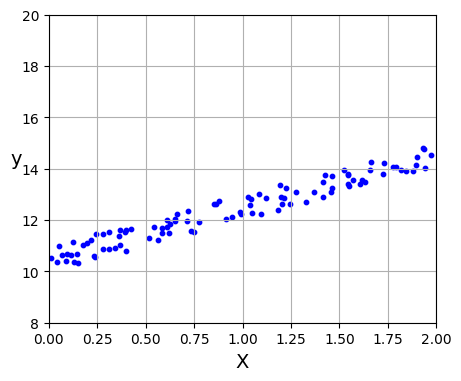

In [4]:
## Plot
plt.figure(figsize=(5,4))
plt.grid(True)
plt.axis([0,2,8,20])
plt.xlabel("X")
plt.ylabel("y",rotation=0)
plt.scatter(x=X,y=y,s=10,c='b')

In [5]:
## Finding best theta
from sklearn.preprocessing import add_dummy_feature
X_b = add_dummy_feature(X)     #Add that X0=1 to each instance
print(X_b[:5])                 #See why we used 'add dummy feature': to get those '1s' feature
best_theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

# ".T" does the tanspose, ".inv" does the inverse, "@" does matrix multiplication (If matrix) and dot product (If vector)
best_theta

[[1.         0.74908024]
 [1.         1.90142861]
 [1.         1.46398788]
 [1.         1.19731697]
 [1.         0.31203728]]


array([[10.51359766],
       [ 1.98323418]])

The function we had was y = 10+2x+noise   
from this we expected 'best_theta' to be 10 and 2, but fair enough!

In [6]:
# Predicting
y_pred = 10.5135 + 1.983*X
print("Predicted values\n",y_pred[:5])
print("\n")
print("Acutal values\n",y[:5])

Predicted values
 [[11.99892611]
 [14.28403294]
 [13.41658797]
 [12.88777955]
 [11.13226993]]


Acutal values
 [[11.52958966]
 [14.43926764]
 [13.24233175]
 [12.90320463]
 [11.53164104]]


In [7]:
# Better way to represent
np.random.seed(42)
X_new = np.array([[0,2]]).reshape(2,1)
X_new_b = add_dummy_feature(X_new)
X_new_pred = X_new_b @ best_theta

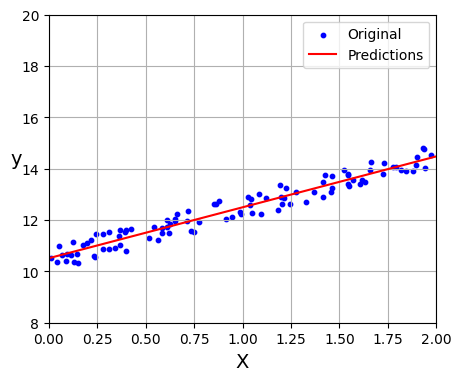

In [8]:
plt.figure(figsize=(5,4))
plt.grid(True)
plt.axis([0,2,8,20])
plt.xlabel("X")
plt.ylabel("y",rotation=0)
plt.scatter(x=X,y=y,s=10,c='b',label='Original')
plt.plot(X_new,X_new_pred,c='r',label='Predictions')

plt.legend(fontsize=10)

But there are more ways to get that $\theta$ such that cost function of linear regression model is minimum

1. The normal Equation:
$$\hat{\theta} = (X^\top X)^{-1}X^\top y$$

But when $(X^\top X)^{-1}$ does not exist, i.e X is singluar matrix or illfunctioned then there are two more ways.     
Under the hood they used _SVD (Singluar Value Decomposition)_ to compute numerically stable solution even when $(X^\top X)^{-1}$ doesnt exist.  

2. np.linalg.lstsq   
lstsq stands for _least square solver_, Uses SVD to compute $min_\theta(||X\theta - y||^2)$  
returns: Best_theta, residuals, Rank of matrix X, Singluar values of X  

3. np.linalg.pinv  
np.linalg.pinv computes the Moore–Penrose pseudoinverse of a matrix. It gives you a stable “inverse” even when the matrix isn’t square or is singular.  
Uses SVD to calculate $X^{+}$ (Psuedoinverse)  
We can get $$\hat{\theta} = X^{+}y$$


- Use pinv when you actually need the pseudoinverse matrix (e.g. for sensitivity analysis or multiple right‑hand sides).

- Use lstsq when you just want the best‑fit $\theta$ or residual, rank and singluar values 


In [9]:
## Using The normal equation
best_theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
best_theta

array([[10.51359766],
       [ 1.98323418]])

In [10]:
## Using lstsq

best_theta_svd, residual, rank, singular_value = np.linalg.lstsq(X_b,y)
best_theta_svd

array([[10.51359766],
       [ 1.98323418]])

In [11]:
## Using pinv

pinv_X = np.linalg.pinv(X_b)
best_theta_pinv = pinv_X @ y
best_theta_pinv

array([[10.51359766],
       [ 1.98323418]])

In [12]:
## Getting it directly using LinearRegression
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)

lin_reg.intercept_,lin_reg.coef_

(array([10.51359766]), array([[1.98323418]]))

### __Computational Complexity__ (of linear regression)

There are two methods for training linear regression model  
1. The normal equation:   
main cost: Doing inverse of $X^\top X$ which is a $(n+1)\times(n+1)$ matrix.
The time complexity is between $O(n^{2.4})-O(n^3)$ where $n$ is number of features.   
i.e if the number of features increase by 2x, time to train will increase by 8x


2. The SVD (Singular value decomposition)
It is used internally in _sklearn.linear_model.LinearRegression_   
The time complexity is $O(n^2)$  
Better than the normal equation but still kinda bad for large number of features   


`Note:`  
- Though, the time complexity for samples is linear, i.e $O(n)$ → training time roughly doubles when number of samples is doubled.  Which is good !

- Predictions are fast. time complexity for predictions are linear for both number of samples and number of features.   
    - On prediction, If you double the number of samples, prediction time will be doubled.   
    - If your model was trained on n features, prediction time is proportional to n.But if you design a new model (retrain) with 2n features and then predict — the prediction time will be roughly doubled compared to the old model.

## _Gradient Descent_

Rather than directly computing the $\theta$ vector, it uses an _iterative_ approach to get that $\theta$.  
The idea is to: _Tweak the parameters until you get minumum cost function_ (here MSE)

Steps: 
- Random initialization: Randomly select the parameter and calculate the slope (gradient)
- Try to move in the direction where slope is getting closer to _Zero_ (Hence, Cost function minimum)
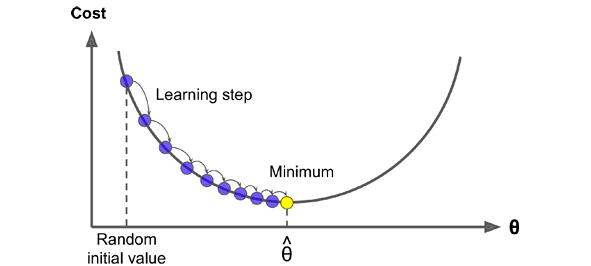
- Learning rate: i.e size of steps,   
if the learning rate is too small → the algorithm will have to go through many iterations(which is costly). 
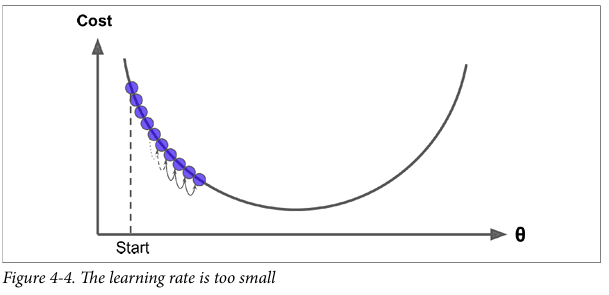

    And if the learning rate is too big → algorithm can miss the minimum point.
    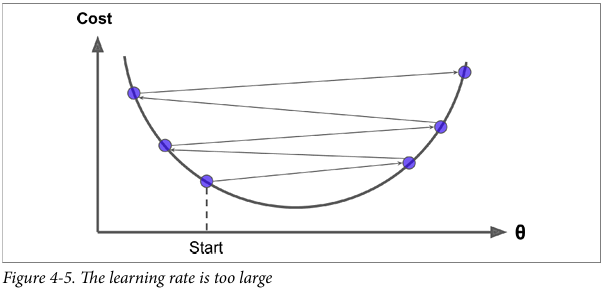

__Problem with Gradient Descent__  
The cost functions sometimes may not be so simple, may contain different shapes, bends, holes etc.
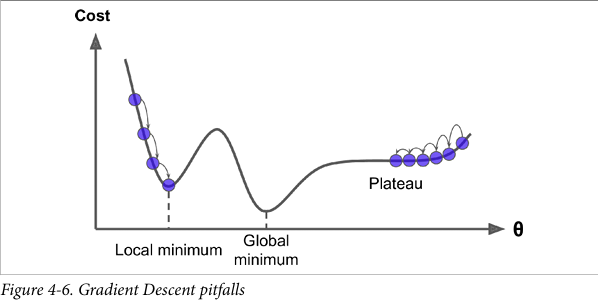

Fortunately thats not the case with MSE cost function for Linear Regression  

___MSE Cost function for Linear Regression is:___
- Convex function - looks like a bowl
- only one minimum exists (Global minima)
- The slope does not change suddenly - No death zones

Hence, if given a proper learning rate and enough iterations - Gradient Descent will converge on minimum mostly


___Effect of `Feature Scaling` on gradient descent___

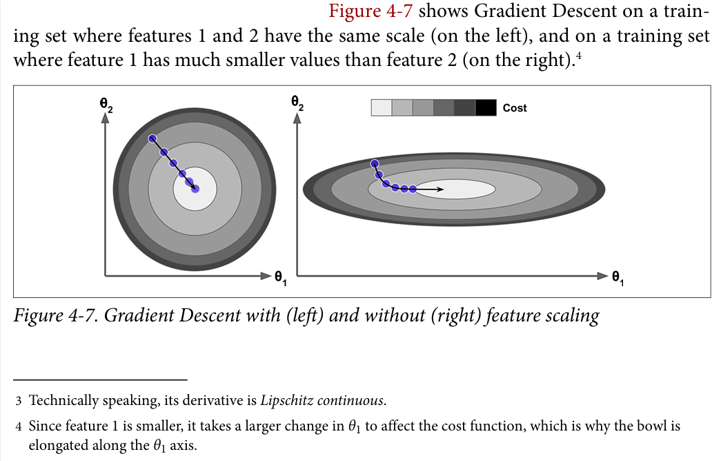


 When using Gradient Descent, you should ensure that all features
 have a similar scale (e.g., using Scikit-Learn’s StandardScaler
 class), or else it will take much longer to converge.

___What does `training a model` exactly means?___   
It means searching for a set of parameters that minimizes the cost function.

_Parameter Space_: A space where all the model parameters exist. Training a model refers to finding the best spot.  
A model with high number of parameters takes more training time because the parameter space is of high dimension. (dimension refers to number of parameters).

- ##  _Batch Gradient Descent_

#### Batch Gradient Descent computes the gradient of the cost function using the entire training dataset.

Formula used: _Partial derivative of cost function_

$$
\frac{\partial}{\partial\theta_{j}}MSE(\theta)=\frac{2}{m}\sum_{i=1}^{m}\left(\theta^{\top}\mathbf{x}^{(i)}-y^{(i)}\right)x_{j}^{(i)}
$$




Explaination:  
- This is partial derivative of cost function wrt $\theta_j$ (jth feature weight)
- $m$: total number of samples
- $i$: $i^{th}$ sample 
- $\theta^{\top} x^{(i)}$: $y_{predict}$ of ith sample
- $y^{(i)}$: original y (True value)
- $x_j^{(i)}$: value of $j_{th}$ feature of $i_{th}$ sample

_Gradient vector_ : A vector containg partial derivative of all features

$$
\nabla_\theta MSE(\theta) = 
\begin{pmatrix}
\frac{\partial}{\partial \theta_0} MSE(\theta) \\
\frac{\partial}{\partial \theta_1} MSE(\theta) \\
\vdots \\
\frac{\partial}{\partial \theta_n} MSE(\theta)
\end{pmatrix}
= \frac{2}{m} X^\top (X\theta - y)
$$

Note: Since batch gradient descent involves calculation on whole training batch at every step, its called _batch_ gradient descent.  
And this is the reason its terribly slow on large data sets.  
But still more efficient for data sets with large number of feature than normal equation and SVD.

Next Step:  
If your gradient vector points uphill, go in opposite direction - downhill  
_Subtract $\nabla_{\theta}MSE$ from $\theta$ :_
$$
\theta^{next} = \theta - \eta\nabla_{\theta}MSE
$$

where:  
$\eta$: is _learning rate_, It determines the size of downhill step we want to go

In [13]:
#Test
n = 0.2                 #Learing rate
iterations = 1000       #number of iterations
m = len(X)              #number of samples

np.random.seed(42)
theta = np.random.randn(2,1)   # Random initialization

for iteration in range(iterations):
    gradient = (2/m) * ((X_b.T) @ ((X_b @ theta) - y))
    theta = theta - (n * gradient)

theta

array([[10.51359766],
       [ 1.98323418]])

In [14]:
## Best theta that we got from earlier is 
best_theta

array([[10.51359766],
       [ 1.98323418]])

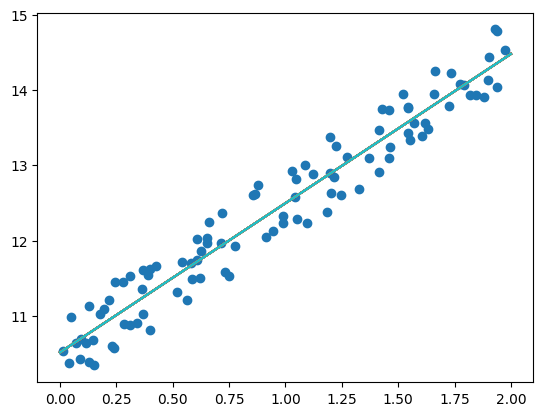

In [15]:
## Plots with different learning rate

def plot_gradient_descent(theta,eta):
    iterations = 1000
    m = len(X)
    X_new = np.array([[0,2]]).reshape(2,1)
    X_new_b = add_dummy_feature(X_new)
    plt.scatter(X,y)
    for iteration in range(iterations):
        #Showing only 20 iterations 
        if iteration < 20:
            y_pred = X_new_b @ theta
            plt.plot(X_new,y_pred)
        gradient = (2/m) * ((X_b.T) @ ((X_b @ theta) - y))
        theta = theta - (eta*gradient)

plot_gradient_descent(theta=theta,eta =0.1)

In [16]:
X_new_b @ theta

array([[10.51359766],
       [14.48006601]])

In [17]:
y.min()

np.float64(10.338977716273847)

- ## _Stochastic Gradient Descent_

Here, instead of using whole training dataset for calculating gradient at every step.  
The Stochastic Gradient Descent only uses one random _instance_ of data to calculate gradient at each step.  

Since only one instance needs to be on memory at each step, this algorithm is used in ___out-of-core learning___' - learning where data is too large for single memory, algorithms only use a part of data to train the model until model is trained on whole dataset

- Behaviour of SGD

1. Its stochastic (random) --> The path towards lowest cost is bouncy and noisy, it does not reach min cost smoothly
2. Over time even when it reaches minimum it still bounces near the minimum --> Final parameters are good but not optimal
3. Its irrgular but that can be beneficial too, consider a cost function that is not convex like MSE and contain local & global minima then SGD is better since it can bounce and find global minima (it doesnt stop at local minima only)  (See the 'problems with gradient descent above, SGD solves that)


- Solution:  
___Simulated annealing___ : method where we reduce the learning rate gradually.
start with large steps (quick progress) then smaller and smaller steps (settle at global minima)


The function that determines the learning rate($\eta$) at each iteration is called the __learning schedule__
$$\text{learning schedule} = \frac{t_0}{t+t_1}$$ 
- where, $t$ is iteration number and $t_0$ and $t_1$ is defined by us (generally 5,50)

agian it follows the same function 
$$
\theta^{next} = \theta - \eta\nabla_{\theta}MSE
$$


In [18]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(
    loss='squared_error',    #MSE is cost function
    penalty=None,            #Will learn about later
    max_iter=1000,           #Max iterations to reach min cost
    tol=0.001,               #Tolerance : if the next step is not reducing cost by atleast 0.001 then stop the algorithm
    eta0=0.1                 #Initial learning rate (will gradually decrease)
    )

y = y.reshape(len(y))      # previously y.shape=(100,1) we need (100,)
sgd_reg.fit(X,y)

SGDRegressor(eta0=0.1, penalty=None)

In [19]:
bias,weight = sgd_reg.intercept_, sgd_reg.coef_
bias,weight

(array([10.49145963]), array([2.00326097]))

- ## _Mini-Batch Gradient Descent_
Instead of using single instance(as in SGD) or using whole dataset(as in Batch GD) at each step  
Mini Batch Gradient Descent uses a small portion of dataset at each step

Here we calculate gradients using a small random portion of data at each step till we reach minimum of cost function.

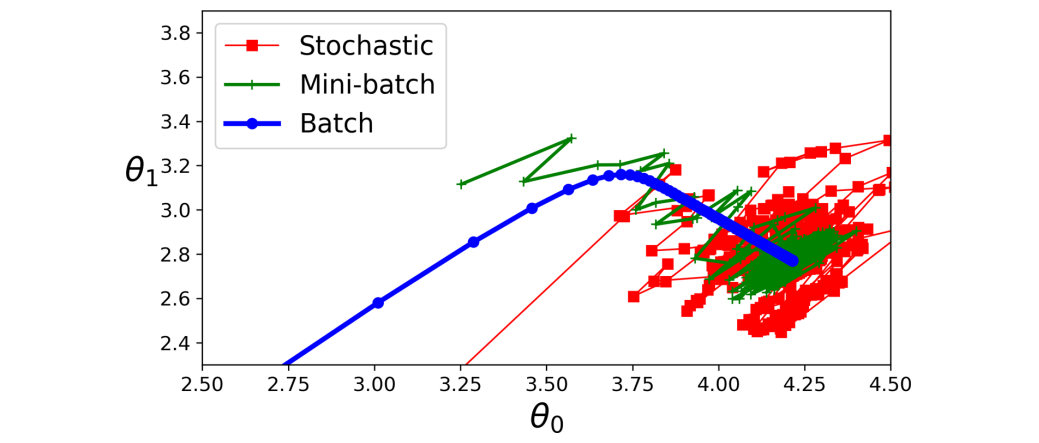

In [20]:
import numpy as np

# Generate synthetic linear data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add bias term (x0 = 1) to each instance
X_b = np.c_[np.ones((100, 1)), X]

# Hyperparameters
learning_rate = 0.1
n_epochs = 50
batch_size = 20
m = len(X_b)

# Initialize theta (weights)
theta = np.random.randn(2, 1)

# Training loop
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    
    for i in range(0, m, batch_size):
        X_batch = X_b_shuffled[i:i+batch_size]
        y_batch = y_shuffled[i:i+batch_size]
        
        gradients = 2 / batch_size * X_batch.T.dot(X_batch.dot(theta) - y_batch)
        theta = theta - learning_rate * gradients

# Final parameters
print("Learned parameters (theta):\n", theta)


Learned parameters (theta):
 [[4.22191654]
 [2.7700278 ]]



- The main advantage over SGD : GPUs/CPUs are made designed especially for Matrices and vectors, while STG have one instance --> one gradient at each step  
The GPUs can calulate mini-batches quickly through matrix operations hence we get performance boost by hardware.

### The gradient descents in parameter space
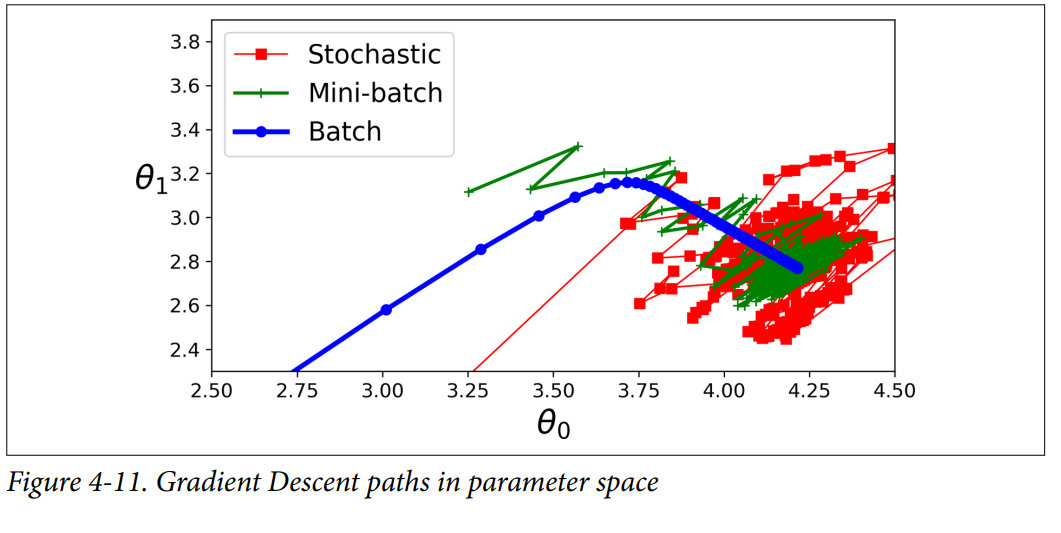

### Comparison of algorithms for Linear Regression

| Algorithm        | Large *m* | Out-of-core support | Large *n* | Hyperparams | Scaling required | Scikit-Learn     |
|------------------|------------|----------------------|------------|---------------|-------------------|-------------------|
| Normal Equation  | Fast       | No                   | Slow       | 0             | No                | N/A               |
| SVD              | Fast       | No                   | Slow       | 0             | No                | `LinearRegression` |
| Batch GD         | Slow       | No                   | Fast       | 2             | Yes               | `SGDRegressor`    |
| Stochastic GD    | Fast       | Yes                  | Fast       | ≥2            | Yes               | `SGDRegressor`    |
| Mini-batch GD    | Fast       | Yes                  | Fast       | ≥2            | Yes               | `SGDRegressor`    |
